# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

# Reading the dataset into a pandas Dataframe and viewing the data

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


# Printing some statistics for all the columns

In [4]:
data.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

# Before we handle the missing data we have to remove some features that doesn't play any role in the prediction of rent prics

In [6]:
data = data.drop(["id","url","region_url","image_url","description"],axis=1)

In [7]:
data

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
384973,reno / tahoe,1549,apartment,1034,2,2.0,1,1,0,0,0,0,w/d in unit,NaN,39.6269,-119.708,ca
384974,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5358,-119.746,ca
384975,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.5585,-119.703,ca


In [8]:
data.isnull().sum()

region                          0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
lat                          1918
long                         1918
state                           0
dtype: int64

# We can see that 4 columns have missing values. Each column will be handled seperately.

## First we are going to look at the "laundry_options" column. It has 79026 missing values

In [9]:
data.laundry_options.unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', 'laundry in bldg',
       nan, 'no laundry on site'], dtype=object)

In [10]:
data['laundry_options'] = data['laundry_options'].fillna(data['laundry_options'].mode()[0])
data

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
384973,reno / tahoe,1549,apartment,1034,2,2.0,1,1,0,0,0,0,w/d in unit,NaN,39.6269,-119.708,ca
384974,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5358,-119.746,ca
384975,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.5585,-119.703,ca


## Then we are going to work on the "parking_options" column. It has 140687 missing values

In [11]:
data.parking_options.unique()

array(['carport', 'attached garage', nan, 'off-street parking',
       'detached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [12]:
data['parking_options'] = data['parking_options'].fillna(data['parking_options'].mode()[0])
data

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking,39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
384973,reno / tahoe,1549,apartment,1034,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking,39.6269,-119.708,ca
384974,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5358,-119.746,ca
384975,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.5585,-119.703,ca


In [13]:
data.isnull().sum()

region                        0
price                         0
type                          0
sqfeet                        0
beds                          0
baths                         0
cats_allowed                  0
dogs_allowed                  0
smoking_allowed               0
wheelchair_access             0
electric_vehicle_charge       0
comes_furnished               0
laundry_options               0
parking_options               0
lat                        1918
long                       1918
state                         0
dtype: int64

## Since the number of records without "lat" and "long features are less when compared to the total number of records, we are going to drop them.

In [14]:
data = data.dropna(how='any',axis=0) 

In [15]:
data.isnull().sum()

region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
dtype: int64

# Outlier Removal

## We are going to check column values to check for any outliers

In [16]:
data.laundry_options.value_counts()

w/d in unit           209575
w/d hookups            75133
laundry on site        58759
laundry in bldg        35990
no laundry on site      3602
Name: laundry_options, dtype: int64

In [17]:
data.parking_options.value_counts()

off-street parking    268012
attached garage        40094
carport                38871
detached garage        16852
street parking         15908
no parking              3176
valet parking            146
Name: parking_options, dtype: int64

In [18]:
data.baths.value_counts()

1.0     197296
2.0     134006
1.5      27256
2.5      13033
3.0       5443
0.0       3090
4.0       1478
3.5       1005
4.5        223
5.0        130
5.5         57
6.0         26
6.5          4
7.0          4
75.0         2
7.5          2
8.0          1
25.0         1
35.0         1
8.5          1
Name: baths, dtype: int64

In [19]:
data.beds.value_counts()

2       174705
1       116823
3        66520
4        11454
0        10922
5         2313
6          238
7           49
8           31
1000         2
1100         2
Name: beds, dtype: int64

### Both "baths" and "beds" columns have a lot of outliers, which needs to be removed.
### Let's assume that a house cannot have more than 5 beds and 5 baths. We are going to remove the outlier values according to our assumption.

In [20]:
bed_bath_outlier = ((data["beds"]>5) | (data["baths"]>5))
print("No of outliers removed: {} ".format(data[bed_bath_outlier]["beds"].count()))
data = data[~bed_bath_outlier]

No of outliers removed: 397 


In [21]:
data.price.describe()

count    3.826620e+05
mean     8.831914e+03
std      4.475635e+06
min      0.000000e+00
25%      8.060000e+02
50%      1.035000e+03
75%      1.395000e+03
max      2.768307e+09
Name: price, dtype: float64

In [22]:
data.sqfeet.describe()

count    3.826620e+05
mean     1.056994e+03
std      1.920823e+04
min      0.000000e+00
25%      7.500000e+02
50%      9.480000e+02
75%      1.148000e+03
max      8.388607e+06
Name: sqfeet, dtype: float64

### From the above statistics we can see that "price" and "sqfeet" columns also have outliers.

### Lets assume that a house rent has to be a minimum of 100 and maximum of 6000.
### Lets assume that a house area to be a minimum of 150 and a maximum of 4000. According to the assumption we made, the outliers are being removed.

In [23]:
price_sqfeet_outlier = ((data["sqfeet"]<150) | (data["sqfeet"]>4000) | (data["price"]<100) | (data["price"]>6000))
print("No of outliers removed: {} ".format(data[price_sqfeet_outlier]["price"].count()))
data = data[~price_sqfeet_outlier]

No of outliers removed: 4059 


### The size of data after handling missing values and removal of outlier

In [24]:
data.shape

(378603, 17)

# Data Visualization

### Beds vs Count

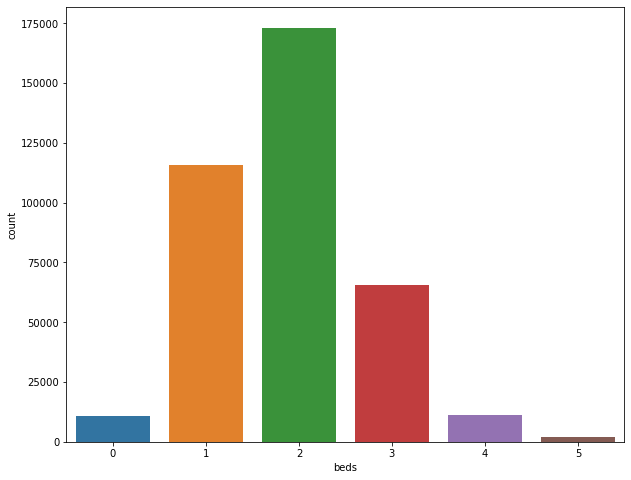

In [25]:
sns.countplot(data["beds"])
fig = plt.gcf()
fig.set_size_inches(10,8)

### Baths vs Count

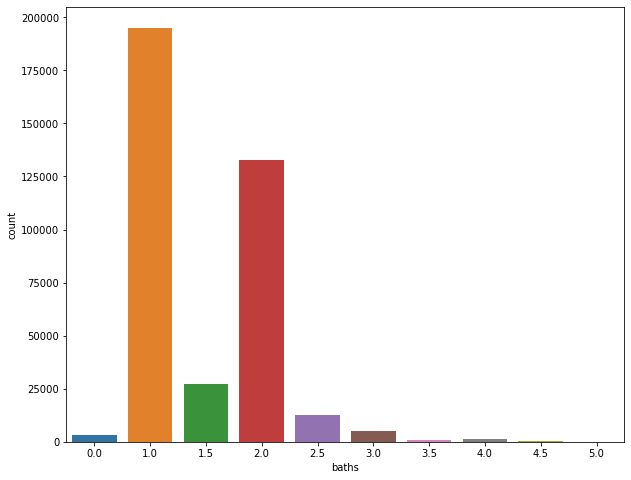

In [26]:

sns.countplot(data["baths"])
fig = plt.gcf()
fig.set_size_inches(10,8)

### Hosuing Type Distribution

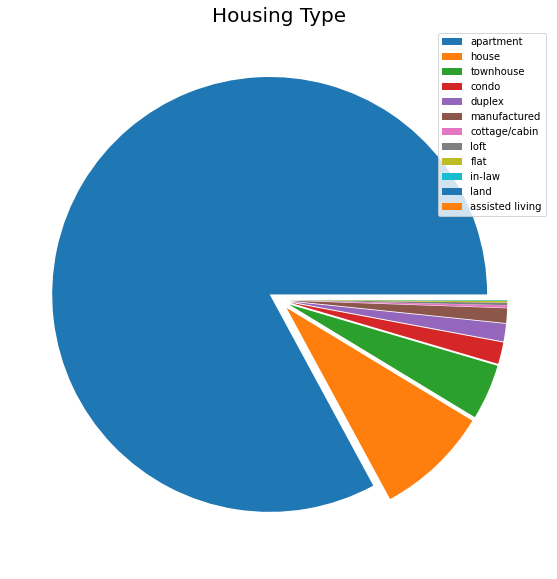

In [27]:
housing_type = data.type.value_counts()
pie, ax = plt.subplots(figsize=[10,10])
labels = housing_type.keys()
plt.pie(x=housing_type, explode=[0.05]*12, labels = None)
plt.legend(labels = labels)
plt.title("Housing Type", fontsize=20);

### Laundry Options Distribution

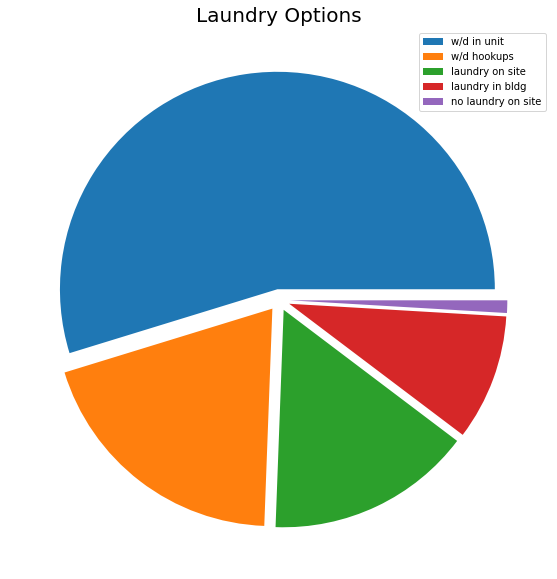

In [28]:
laundry_type = data.laundry_options.value_counts()
pie, ax = plt.subplots(figsize=[10,10])
labels = laundry_type.keys()
plt.pie(x=laundry_type, explode=[0.05]*5, labels = None)
plt.legend(labels = labels)
plt.title("Laundry Options", fontsize=20);

### Parking Options Distribution

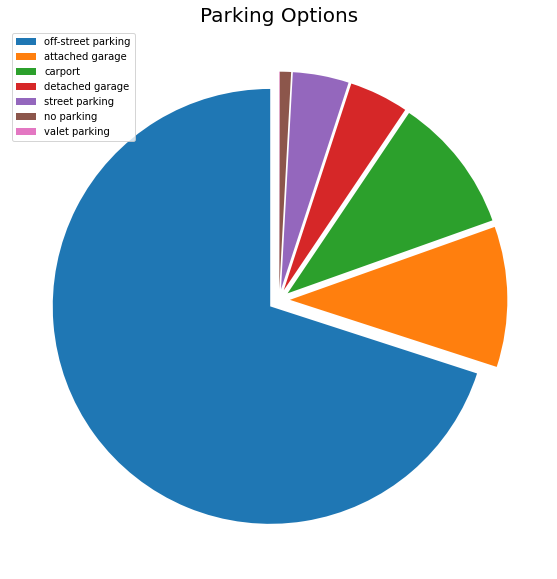

In [29]:
parking = data.parking_options.value_counts()
pie, ax = plt.subplots(figsize=[10,10])
labels = parking.keys()
plt.pie(x=parking,explode=[0.05]*7, labels = None,startangle=90)
plt.legend(labels = labels)
plt.title("Parking Options", fontsize=20)
plt.show()

### Furnished Homes Distribution

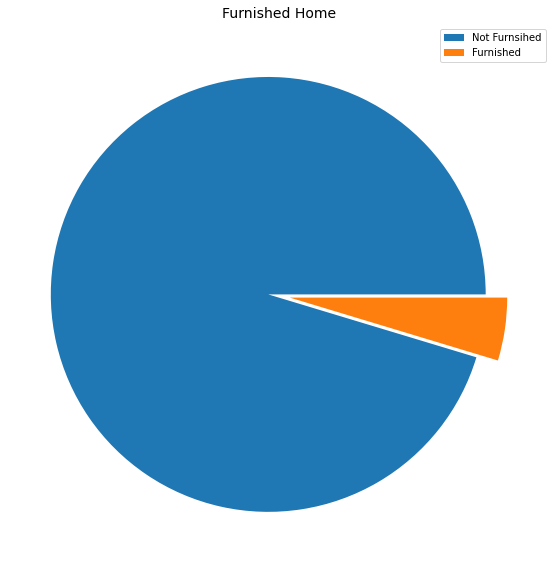

In [30]:
furnished = data.comes_furnished.value_counts()
pie, ax = plt.subplots(figsize=[10,10])
labels = furnished.keys()
plt.pie(x=furnished, explode=[0.05]*2, labels = None)
plt.legend(labels = ['Not Furnsihed','Furnished'])
plt.title("Furnished Home", fontsize=14)
plt.show()

### Dogs Allowed Count Plot

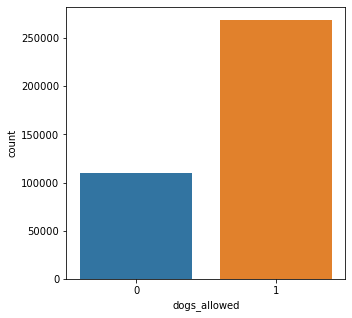

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(data['dogs_allowed'])
plt.show()

### Cats Allowed Count Plot

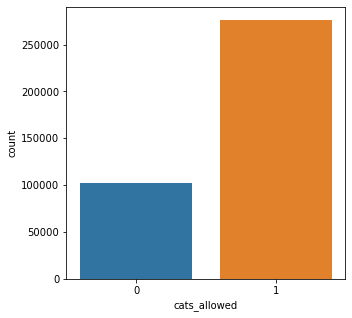

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(data['cats_allowed'])
plt.show()

### Wheelchair Access Count Plot

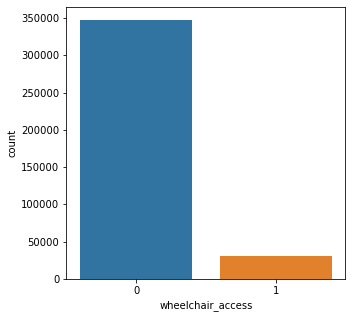

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(data['wheelchair_access'])
plt.show()

### Electric Vehicle Charger Count Plot

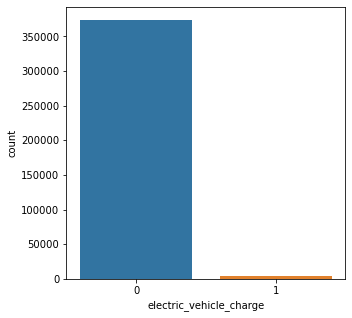

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(data['electric_vehicle_charge'])
plt.show()

### Furnished Houses Count Plot

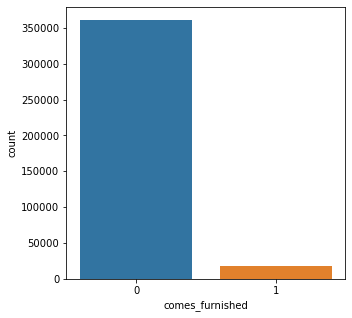

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(data['comes_furnished'])
plt.show()

### Smoking Allowed Count Plot

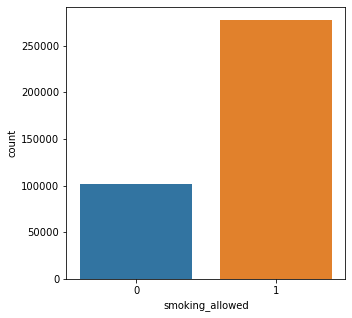

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(data['smoking_allowed'])
plt.show()

### State wise Distribution

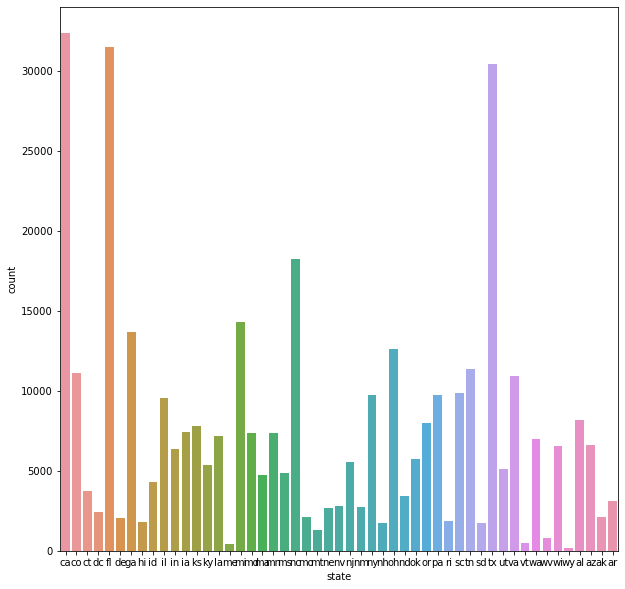

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(data['state'])
plt.show()

### Price vs Sqfeet Plot

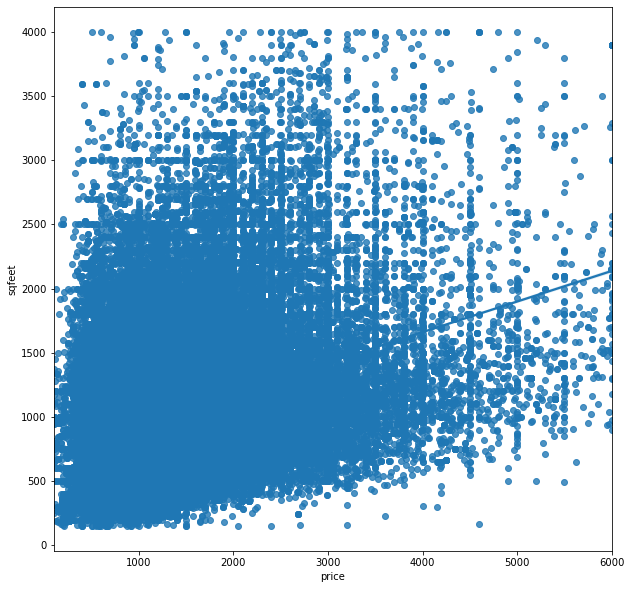

In [38]:
plt.figure(figsize=(10,10))
sns.regplot(x= data.price, y = data.sqfeet)
plt.show()

### Histogram of Rent Prices

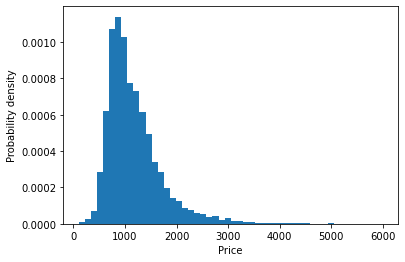

In [39]:
fig, ax = plt.subplots()
num_bins = 50
n, bins, patches = ax.hist(data.price, num_bins, density=True)
ax.set_xlabel('Price')
ax.set_ylabel('Probability density')
plt.show()

### Histogram of Housing Area

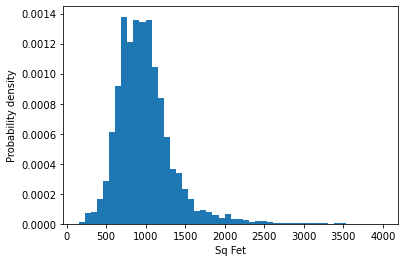

In [40]:
fig, ax = plt.subplots()
num_bins = 50
n, bins, patches = ax.hist(data.sqfeet, num_bins, density=True)
ax.set_xlabel('Sq Fet')
ax.set_ylabel('Probability density')
plt.show()

# Feature Engineering

### Creating a new feature "price_per_sqft"

In [41]:
data['rent_per_sqft'] = round(data['price']/data['sqfeet'], 3)
data.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,rent_per_sqft
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca,1.065
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca,1.199
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca,1.077
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca,1.547
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking,39.5357,-119.805,ca,1.156


### Instead of having 2 different columns for "cats_allowed" and "dogs_allowed", we can combine it into a new column "pets_allowed"

In [42]:
data['pets_allowed'] = data['dogs_allowed'] | data['cats_allowed']
data.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,rent_per_sqft,pets_allowed
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca,1.065,1
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca,1.199,0
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca,1.077,1
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca,1.547,1
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking,39.5357,-119.805,ca,1.156,1


In [43]:
data = data.drop(['dogs_allowed','cats_allowed'], axis=1 )

## Transforming the categorical variables

In [44]:
le = LabelEncoder()
data['region'] = le.fit_transform(data['region'])
data['laundry_options'] = le.fit_transform(data['laundry_options'])
data['parking_options'] = le.fit_transform(data['parking_options'])
data['type'] = le.fit_transform(data['type'])
data = data.drop(["state"],axis =1)

## Correlation Matrix

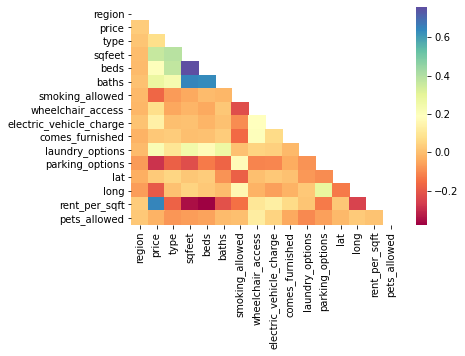

In [45]:
x = data.corr()
y = np.triu(x)
sns.heatmap(x, mask = y, cmap = 'Spectral')
plt.rcParams["figure.figsize"] = 10,10
plt.show()

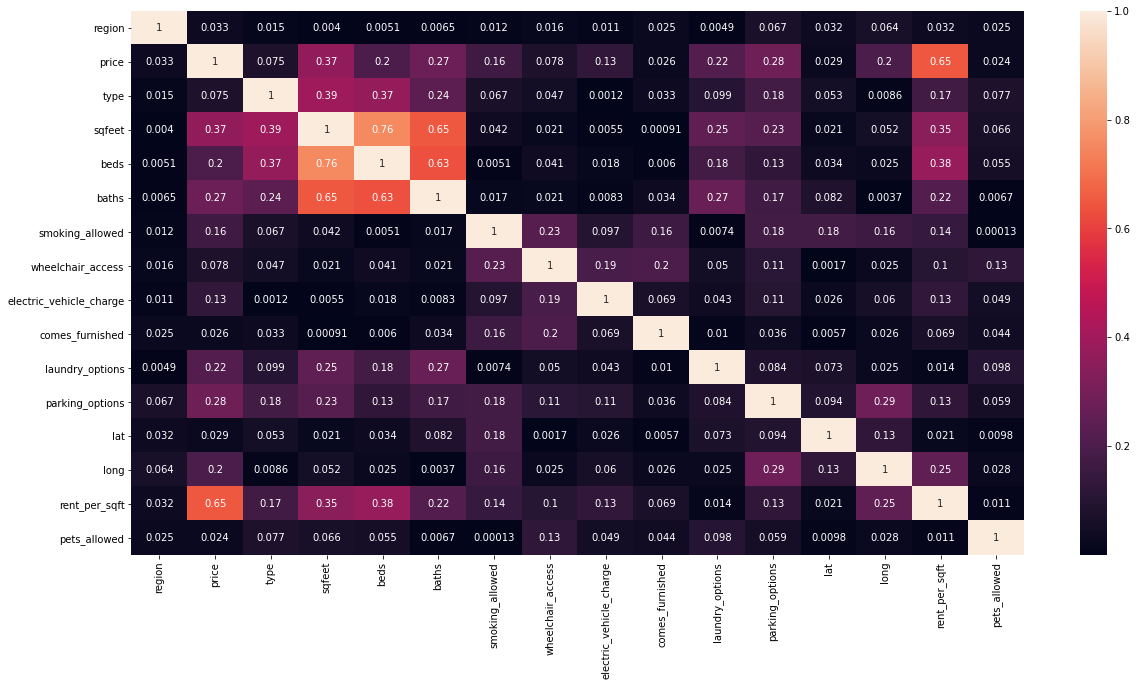

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

## Assigning variables for the features and target variable

In [47]:
y = data['price']
X = data.drop(columns=["price"])
#Standardization of the data
X_std = preprocessing.scale(X)

# Splitting the dataset for train and test

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size = 0.30,random_state=470)


# Importing models for training

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [50]:
dtr = DecisionTreeRegressor()
ran = RandomForestRegressor(n_estimators=90)
lin = LinearRegression()
xgb = XGBRegressor()

In [51]:
models = {"Decision Tree" : dtr,
          "Random Forest" : ran,
          "Linear Regression" : lin,
         "XG Boost Regressor": xgb}
scores= { }

In [52]:
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [53]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random Forest,0.999649
Decision Tree,0.998959
XG Boost Regressor,0.998860
Linear Regression,0.821978


## From the above scores, we are choosing the Random Forest Regressor for the estimation of rent prices

In [54]:
print("Training Accuracy:", round(ran.score(X_train,y_train)*100, 3), "%")
print("Test Accuracy:", round(ran.score(X_test,y_test)*100, 3),"%")


Training Accuracy: 99.995 %
Test Accuracy: 99.965 %


In [56]:
y_pred=ran.predict(X_test)
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9996487368085112
MAE: 1.4619093664559912
MSE: 111.55279142193116
RMSE: 10.56185549143384


# Finally we can conclude that Random Forest Regressor can be used to estimate the rent prices with an accuracy of 99.965%